<a href="https://colab.research.google.com/github/sarthaknaithani/CS6910_CS22M078/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cs22m078. Use `wandb login --relogin` to force relogin


True

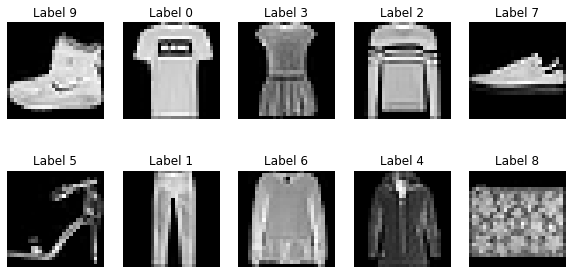

In [5]:
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="CS6910_Assignment-1",
)

# simulate training
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# x_train is a (60000,28,28) matrix consisting image pixels for training
# y_train is a (60000,1) matrix consisting of labels
# x_test is a (10000,28,28) matrix consisting image pixels for testing
# y_test is a (10000,1) matrix consisting of labels for testing
(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()
labels=set()
i=0
fig,ax=plt.subplots(2,5,figsize=(10,5))
row=0
col=0
for pixels in x_train:
  #The matplotlib function imshow() creates an image from a 2-dimensional numpy array
  #pixels is (28,28) 2-D array
  #l is the current label of image
  l=y_train[i]
  if(not(l in labels)):
    if(col>=5):
      col=0
      row+=1
    ax[row][col].imshow(pixels,cmap="gray")
    ax[row][col].set_title("Label {}".format(l))
    ax[row][col].axis(False)
    labels.add(l)
    col+=1
  #if we get all our 10 labels just break the loop
  if(len(labels)==10):
    break;
  i+=1
wandb.log({"plot":plt})   
# finish the wandb run, necessary in notebooks
wandb.finish()

# INITIALIZING THE PARAMETERS

In [6]:
#USING XAVIER INITIALIZATION TO INITIALIZE WEIGHTS AND BIAS MATRIX
# h=int(input('Enter no. of hidden layers '))
h=3
neurons=[64,64,64]
weights=[]
biases=[]
np.random.seed(42)
for i in range(0,h):
  # n=int(input('Enter no. of neurons in {} hidden layer '.format(i+1)))
  # neurons.append(n)
  n=neurons[i]
  # appending the weight and bias matrix for the ith layer
  if(i==0):
    weights.append(np.random.randn(n,784)*np.sqrt(2/(n+784)))
    # biases.append(np.random.randn(n,1)*np.sqrt(2/(n+1)))
    biases.append(np.zeros((n,1)))

  else:
    weights.append(np.random.randn(n,neurons[i-1])*np.sqrt(2/(n+neurons[i-1])))
    # biases.append(np.random.randn(n,1)*np.sqrt(2/(n+1)))
    biases.append(np.zeros((n,1)))
weights.append(np.random.randn(10,neurons[h-1])*np.sqrt(2/(10+neurons[h-1])))
# biases.append(np.random.randn(10,1)*np.sqrt(2/(11)))
biases.append(np.zeros((10,1)))
# np.random.seed(0)
# for i in range(0,h):
#   # n=int(input('Enter no. of neurons in {} hidden layer '.format(i+1)))
#   # neurons.append(n)
#   n=neurons[i]
#   # appending the weight and bias matrix for the ith layer
#   if(i==0):
#     weights.append(np.random.randn(n,784)*0.01)
#     biases.append(np.random.randn(n,1)*0.01)
#   else:
#     weights.append(np.random.randn(n,neurons[i-1])*0.01)
#     biases.append(np.random.randn(n,1)*0.01)
# weights.append(np.random.randn(10,neurons[h-1])*0.01)
# biases.append(np.random.randn(10,1)*0.01)
print(weights[0])
print(weights[1])

[[ 0.02412257 -0.00671471  0.03145454 ... -0.06485005  0.01846404
   0.02965267]
 [ 0.02718583  0.05248735  0.04049884 ... -0.01366247  0.00325336
   0.02505622]
 [-0.07588394 -0.02569307  0.0385729  ... -0.01903782  0.05147506
   0.02996446]
 ...
 [ 0.04353243  0.0363882  -0.01817027 ...  0.03068041 -0.03630795
   0.06362319]
 [-0.02837991  0.05387926  0.11000857 ...  0.04002819  0.0121057
  -0.00581449]
 [ 0.00302782  0.00362412  0.057071   ... -0.0276426   0.07762404
  -0.03189194]]
[[ 0.11679612  0.00272403  0.08919528 ...  0.07975651 -0.04424788
   0.25216238]
 [-0.17638795  0.04279199  0.20779395 ... -0.01202709  0.04963598
   0.01599616]
 [ 0.27869375 -0.08205199 -0.01878961 ... -0.08842606 -0.04975177
  -0.0192414 ]
 ...
 [-0.17397604  0.13890593  0.17285651 ...  0.01102957  0.17116405
  -0.24312006]
 [ 0.05390634  0.01388906 -0.08514754 ...  0.03837353 -0.03460294
  -0.05492674]
 [-0.03456708 -0.36028369 -0.05523713 ...  0.07795044  0.08804448
   0.213222  ]]


# IMPLEMENTING FEEDFORWARD NEURAL NETWORK

In [7]:
# def sigmoid(a):
#   return 1/1+np.exp(-(a))
  # res=[None]*len(a)
  # for i in range(0,len(a)):
  #   if a[i]<0:
  #     res[i]=np.exp(a[i])/1+np.exp(a[i])
  #   else:
  #     res[i]=1/1+np.exp(-a[i])
  # return res
import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid function for the input x, where x is a scalar or a numpy array.
    """
    if isinstance(x, np.ndarray):
        # Use numpy's exp function for arrays
        return 1.0 / (1.0 + np.exp(-x))
    else:
        # For scalar values, use a more numerically stable implementation
        if x >= 0:
            return 1.0 / (1.0 + np.exp(-x))
        else:
            return np.exp(x) / (1.0 + np.exp(x))

def softmax(x):
    # x.dtype=np.float128
    s=np.max(x)
    e=np.exp(x-s)
    return e / np.sum(e)
    # return 1. / (1.+np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def FeedForwardNetwork(weights,biases,data):
  #Returns the array containing the output probablity for each class the data can belong
  l=len(biases)
  a=[None]*(l+1)
  h=[None]*(l+1)
  h[0]=data
  for i in range(1,l+1):
    #weight and bias matrix for hidden-layer i
    weight=weights[i-1]
    bias=biases[i-1]
    #pre activation
    a[i]=(bias+np.matmul(weight,h[i-1]))
    #If last layer that is the output layer we use softmax function else we use sigmoid function
    if(i==l):
      #output function
      h[i]=(softmax(a[i]))
    else:
      #post activation
      h[i]=(sigmoid(a[i]))
  return h[l],h,a

# BACKPROPOGATION

In [8]:
def BackPropogation(weights,biases,H,A,exp_Y,y_hat):
  # Input Parameters of function
  # --> Model Parameters: weights and biases
  # --> H: Post-activations, A: Pre-Activations
  # --> exp_Y: Actual Class Labels
  # Returns list of gradients for each layer wrt weights and biases(parameters)
  L=len(biases)
  gradients_H=[None] * (L+1)
  gradients_W=[None] * (L+1)
  gradients_B=[None] * (L+1)
  gradients_A=[None] * (L+1)
  
  #Computing Gradient For The Output Layer(Pre Activation)

  gradients_A[L]=-(exp_Y-y_hat)
  
  for k in range(L,0,-1):
    # print("k value {}".format(k))
    #compute gradients of the parameters
    gradients_W[k]=np.dot(gradients_A[k],np.transpose(H[k-1]))
    gradients_B[k]=gradients_A[k]
    # print("grad_w {}, grad_b {}".format(gradients_W[k].shape, gradients_B[k].shape))
    #compute gradients of the hidden layers
    gradients_H[k-1]=np.matmul(np.transpose(weights[k-1]),gradients_A[k])
    # print("grad_h {}".format(gradients_H[k-1].shape))
    if(k>1):
      gradients_A[k-1]=np.multiply(gradients_H[k-1],sigmoid_derivative(A[k-1]))
    

  return gradients_W,gradients_B

In [1]:
epoch=0
# predicted class label for each epoch
predicted_y=[None]*10
while epoch<10:
  i=0;
  gradientsW_data=[]
  gradientsB_data=[]
  print(epoch)
  y_hat=[]
  for data in x_train:
    # print(data)
    data=np.reshape(data,(784,1))
    data=data/255.0
    output,post_activations,pre_activations=FeedForwardNetwork(weights,biases,data)
    class_label=y_train[i]
    exp_Y=np.zeros((10,1))
    exp_Y[class_label-1]=1
    gradients_W,gradients_B=BackPropogation(weights,biases,post_activations,pre_activations,exp_Y,output)
    gradients_W=np.array(gradients_W,dtype=object)
    gradients_B=np.array(gradients_B,dtype=object)
    gradientsW_data.append(gradients_W[1:])
    gradientsB_data.append(gradients_B[1:])
    i+=1
    output=np.array(output)
    # if i<=2:
    #   # print(data)
    #   print(output)
    y_hat.append(np.argmax(output))
  # print(gradientsB_data[0])
  gradientsB_data=np.array(gradientsB_data,dtype=object)
  gradientsW_data=np.array(gradientsW_data,dtype=object)
  eta=0.0001
  gradB=gradientsB_data.sum(axis=0)/60000
  gradW=gradientsW_data.sum(axis=0)/60000
  weights=weights-eta*(gradW)
  biases=biases-eta*(gradB)
  print(biases[0])
  # print(weights[0])
  predicted_y[epoch]=(y_hat)
  epoch+=1

0


NameError: ignored

In [204]:
# print(predicted_y[3])
print(len(predicted_y[0]))
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
for i in range(0,len(predicted_y)):
  print("Training accuracy = {} %".format(round(accuracy_score(y_train, predicted_y[i]) * 100, 3)))

60000
Training accuracy = 9.737 %
Training accuracy = 9.737 %
Training accuracy = 9.737 %
Training accuracy = 9.735 %
Training accuracy = 9.733 %
Training accuracy = 9.732 %
Training accuracy = 9.732 %
Training accuracy = 9.732 %
Training accuracy = 9.732 %
Training accuracy = 9.733 %
